# Goal

* Generate a collection of MAGs and isolate genomes for the Christensenellales order

In [42]:
work_dir = '/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/'
clade = 'Christensenellales'
taxid = 990719  # Christensenellaceae 
threads = 8

# Init

In [43]:
library(dplyr)
library(tidyr)
library(data.table)
library(tidytable)
library(ggplot2)
library(LeyLabRMisc)

In [44]:
library(curl)

In [5]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Created directory: /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/ 


# Genomes

# From Genbank

* Used the genomes from the Christensenellaceae primer design

## From Colombian metagenome asesmbly

In [10]:
list_files(file.path(work_dir, 'Colombian_MG'), '*.fna') %>% length

[1] 218

## From UHGG

In [18]:
F = file.path('/ebio/abt3_projects/databases_no-backup/UHGG/2019_09', 'genomes-nr_metadata.tsv')
genomes = Fread(F) %>%
    filter.(grepl('o__Christensenellales', Lineage)) %>%
    separate.(Lineage, taxonomy_levels(), sep=';') 
genomes

Genome,Original_name,Study_set,Genome_type,Length,N_contigs,N50,GC_content,Completeness,Contamination,⋯,Country,Continent,FTP_download,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GUT_GENOME000279,14207_7_64,HBC,Isolate,2615708,20,268821,56.68,99.19,0.81,⋯,United Kingdom,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00073/genomes1/GUT_GENOME000279.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__GCA-900066905,g__GCA-900066905,s__GCA-900066905 sp900066905
GUT_GENOME001938,AsnicarF_2017__MV_FEM2_t1Q14__bin.14,CIBIO,MAG,2965995,141,30137,58.20,99.18,1.17,⋯,Italy,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-038/MGYG-HGUT-03891/genomes2/GUT_GENOME001938.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-74,g__UBA11524,s__UBA11524 sp000437595
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GUT_GENOME286732,ZellerG_2014__CCMD90311071ST-21-0__bin.32,CIBIO,MAG,1752856,264,8460,49.37,91.90,1.88,⋯,Germany,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-005/MGYG-HGUT-00530/genomes1/GUT_GENOME286732.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-138,g__PeH17,s__PeH17 sp000435055
GUT_GENOME286757,ZellerG_2014__CCMD93344354ST-21-0__bin.14,CIBIO,MAG,1369885,414,3602,49.46,70.82,2.42,⋯,Germany,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-005/MGYG-HGUT-00530/genomes2/GUT_GENOME286757.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-138,g__PeH17,s__PeH17 sp000435055


In [19]:
genomes_f = genomes %>%
    filter.(Completeness >= 0.9,
            Contamination < 0.05,
            N_contigs <= 500) %>%
    filter.(Family != 'f__')
genomes_f

Genome,Original_name,Study_set,Genome_type,Length,N_contigs,N50,GC_content,Completeness,Contamination,⋯,Country,Continent,FTP_download,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GUT_GENOME001999,AsnicarF_2017__MV_FEM5_t1Q14__bin.2,CIBIO,MAG,2289322,56,69038,52.62,99.19,0,⋯,Italy,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-007/MGYG-HGUT-00730/genomes2/GUT_GENOME001999.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855
GUT_GENOME004317,BackhedF_2015__SID343_M__bin.4,CIBIO,MAG,1124002,335,3591,50.80,66.07,0,⋯,Sweden,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-026/MGYG-HGUT-02681/genomes1/GUT_GENOME004317.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__QAND01,g__,s__
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
GUT_GENOME286615,ZellerG_2014__CCMD86114146ST-21-0__bin.70,CIBIO,MAG,2162369,61,51782,52.79,96.77,0,⋯,Germany,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-007/MGYG-HGUT-00730/genomes2/GUT_GENOME286615.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855
GUT_GENOME286691,ZellerG_2014__CCMD87156761ST-21-0__bin.83,CIBIO,MAG,923663,345,2702,49.46,52.78,0,⋯,Germany,Europe,ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-005/MGYG-HGUT-00530/genomes2/GUT_GENOME286691.gff.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Christensenellales,f__CAG-138,g__PeH17,s__PeH17 sp000435055


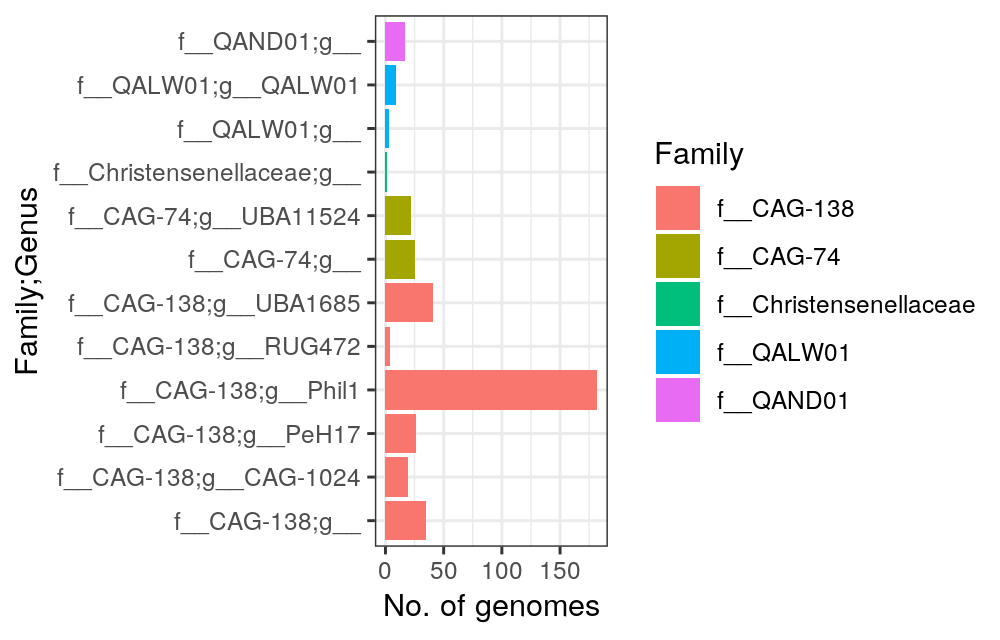

In [25]:
# summarizing taxonomy
p = genomes_f %>%
    summarize.(n = n.(), .by=c(Family, Genus))  %>%
    mutate.(Taxonomy = paste(Family, Genus, sep=';')) %>%
    ggplot(aes(Taxonomy, n, fill=Family)) +
    geom_bar(stat='identity') +
    labs(y='No. of genomes', x='Family;Genus') +
    theme_bw() +
    coord_flip()
p.dims(5,3.2)
plot(p)

In [26]:
# downloading
get_file = function(url, base_dir){
    outfile = file.path(base_dir,  'UHGG', gsub('.+/', '', url))
    message('Downloading: ', url)
    curl_download(url, outfile, mode = "wb")
}

ret = genomes_f$FTP_download %>%
    lapply(get_file, work_dir)
ret %>% length

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-007/MGYG-HGUT-00730/genomes2/GUT_GENOME001999.gff.gz

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-026/MGYG-HGUT-02681/genomes1/GUT_GENOME004317.gff.gz

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-042/MGYG-HGUT-04245/genomes2/GUT_GENOME005637.gff.gz

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-007/MGYG-HGUT-00730/genomes2/GUT_GENOME006149.gff.gz

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-009/MGYG-HGUT-00939/genomes1/GUT_GENOME006702.gff.gz

Downloading: ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-040/MGYG-HGUT-04070/genomes1/GUT_GENOME006711.gff.gz

Down

[1] 384

Parsing gff files

```
(genome) @ rick:/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/UHGG
$ find . -name "*.gff.gz" | xargs -I % /ebio/abt3_projects/databases_no-backup/UHGG/2019_09/prokka_gff2fasta.py %
```

## TUK MAGs

In [28]:
F = '/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG//rnd1/final_MAGs.tsv'
TUK = Fread(F)
TUK

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1002320__metabat2__HighNoCov.035,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002320__metabat2__HighNoCov.035.fna,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Tidjanibacter,Tidjanibacter inops,92.2,4.61,7.14,2261725,365,8314,6196,65550,56.9,86.29,2235
1002335__maxbin2__High.035,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002335__maxbin2__High.035.fna,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes_A,Alistipes_A ihumii,100.0,0.00,0.00,2620923,29,339045,90376,457503,58.5,83.91,2100
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERR3451530__metabat2__High.008,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/ERR3451530__metabat2__High.008.fna,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,CAG-103,CAG-103 sp000432375,88.26,0.67,100,1925297,28,172712,68760,283992,62.2,89.32,1782
ERR3451530__vamb__High.213,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/ERR3451530__vamb__High.213.fna,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Ruminococcaceae,CAG-115,CAG-115 sp003531585,95.97,0.84,100,2811853,271,15050,10375,90239,52.4,88.48,2685


In [29]:
TUK = TUK %>%
    filter.(Order == 'Christensenellales')
TUK

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1002795__metabat2__High.054,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002795__metabat2__High.054.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,PeH17,PeH17 sp000435055,93.94,1.34,0,2081772,47,74861,44293,274868,49.1,86.23,1845
1003355__metabat2__High.078,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1003355__metabat2__High.078.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,PeH17,PeH17 sp000435055,92.93,1.34,0,2045922,29,98160,70549,275567,49.5,86.12,1809
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ERR3451182__metabat2__High.040,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/ERR3451182__metabat2__High.040.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-74,UBA11524,UBA11524 sp000437595,98.60,1.17,0,3151119,47,102152,67045,524993,57.7,87.32,2684
ERR3451511__metabat2__High.016,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/ERR3451511__metabat2__High.016.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,99.19,0.81,100,2112719,182,18021,11608,67673,52.6,90.65,2086


In [31]:
TUK_f = TUK %>%
    filter.(Completeness >= 0.9,
            Contamination < 0.05,
            X..contigs <= 500) %>%
    filter.(Family != 'f__')
TUK_f

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1002469__metabat2__HighNoCov.011,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1002469__metabat2__HighNoCov.011.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,98.39,0,0,2229828,63,59908,35394,166984,52.8,90.20,2136
1006002__maxbin2__Low.057,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1006002__maxbin2__Low.057.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,99.19,0,0,2183900,98,36095,22284,109973,52.6,89.84,2113
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1003478__vamb__Low.002,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1003478__vamb__Low.002.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,Borkfalkiaceae,UBA4636,unclassified,63.46,0.03,100,1294155,397,3402,3259,16255,45.5,88.72,1454
1006313__metabat2__LowNoCov.067,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUK-5projects/LLMGA/v0.12/LLG/rnd1/drep/drep/dereplicated_genomes/1006313__metabat2__LowNoCov.067.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,99.19,0.00,0,1924531,61,47515,31549,136878,53.3,90.10,1794


In [33]:
copy_file = function(F, base_dir){
    outfile = file.path(base_dir, basename(F))
    stopifnot(F != outfile)
    file.copy(F, outfile)
}
res = TUK_f$Fasta %>%
    lapply(copy_file, base_dir=file.path(work_dir, 'TUK'))
res %>% length

[1] 76

## T1k MAGs

In [34]:
F =  '/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG//rnd1/final_MAGs.tsv'
T1k = Fread(F)
T1k

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
AM140__metabat2__High.003,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AM140__metabat2__High.003.fna,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Ruminococcaceae,Ruminococcus_D,Ruminococcus_D bicirculans,96.58,0.00,0.0,2420017,157,27447,15414,70866,43.1,87.97,2239
AP416__metabat2__Med.004_sub,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AP416__metabat2__Med.004_sub.fna,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Dialisteraceae,Dialister,Dialister sp900541485,63.98,3.42,12.5,737017,148,6693,4979,33090,39.6,91.84,807
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
BB280__vamb__Low.145_sub,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/BB280__vamb__Low.145_sub.fna,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Holdemanella,Holdemanella sp002299315,66.51,0.41,0.00,1299578,455,3036,2856,10694,34.2,91.17,1639
BB280__vamb__Med.096,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/BB280__vamb__Med.096.fna,Bacteria,Firmicutes_A,Clostridia,Lachnospirales,Lachnospiraceae,Agathobacter,Agathobacter faecis,99.05,1.98,14.29,2762368,135,27606,20461,97447,43.7,90.78,2681


In [35]:
T1k = T1k %>%
    filter.(Order == 'Christensenellales')
T1k

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
AT573__metabat2__HighNoCov.002,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AT573__metabat2__HighNoCov.002.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,99.19,0.00,0,2369272,65,66039,36450,232224,52.5,90.05,2292
AX681__metabat2__Med.017,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AX681__metabat2__Med.017.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-314,CAG-314,CAG-314 sp000437915,93.95,1.61,0,1443486,45,70685,32077,148713,49.2,90.72,1298
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
AT573__maxbin2__Low.011_sub,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AT573__maxbin2__Low.011_sub.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-917,CAG-349,CAG-349 sp003539515,92.40,2.10,0,1769393,27,366008,65533,577376,47.3,90.06,1608
AV958__metabat2__Med.056,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AV958__metabat2__Med.056.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-314,CAG-314,CAG-314 sp000437915,93.95,0.81,0,1588990,28,114674,56749,246228,48.4,90.25,1415


In [36]:
T1k_f = T1k %>%
    filter.(Completeness >= 0.9,
            Contamination < 0.05,
            X..contigs <= 500) %>%
    filter.(Family != 'f__')
T1k_f

Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..contigs,N50..contigs.,Mean.contig.length..bp.,Longest.contig..bp.,GC,Coding.density,X..predicted.genes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
AT573__metabat2__HighNoCov.002,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AT573__metabat2__HighNoCov.002.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-138,Phil1,Phil1 sp001940855,99.19,0,0,2369272,65,66039,36450,232224,52.5,90.05,2292
AW108__metabat2__HighNoCov.004,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AW108__metabat2__HighNoCov.004.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-917,CAG-475,CAG-475 sp000434435,83.56,0,0,1563909,41,50516,38144,148342,46.8,87.09,1298
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
AS988__metabat2__MedNoCov.013,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AS988__metabat2__MedNoCov.013.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-314,CAG-314,,83.47,0.03,0,1390176,184,11215,7555,46136,49.3,89.24,1345
AR644__metabat2__HighNoCov.010,/ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/Tulsa1000/LLMGA_v0.12/HiSeq_R160-163-169/LLG/rnd1/drep/drep/dereplicated_genomes/AR644__metabat2__HighNoCov.010.fna,Bacteria,Firmicutes_A,Clostridia_A,Christensenellales,CAG-917,CAG-475,CAG-475 sp000434435,85.46,0.00,0,1569791,26,102156,60376,263332,46.4,86.72,1327


In [38]:
# copying files
res = T1k_f$Fasta %>%
    lapply(copy_file, base_dir=file.path(work_dir, 'T1k'))
res %>% length

[1] 6

## List of all genomes

In [59]:
files = list_files(work_dir, '.fna')
samps = data.frame(Name = files %>% as.character %>% basename,
                   Fasta = files,
                   Domain = 'Bacteria',
                   Taxid = taxid) %>%
    mutate(Fasta = gsub('/+', '/', Fasta))
samps

Name,Fasta,Domain,Taxid
<chr>,<chr>,<chr>,<dbl>
MI-001-H__metabat2_high_PE.003.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/Colombian_MG/MI-001-H__metabat2_high_PE.003.fna.gz,Bacteria,990719
MI-002-H__metabat2_high_PE.005.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/Colombian_MG/MI-002-H__metabat2_high_PE.005.fna.gz,Bacteria,990719
⋮,⋮,⋮,⋮
GUT_GENOME286615.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/UHGG/GUT_GENOME286615.fna.gz,Bacteria,990719
GUT_GENOME286691.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/UHGG/GUT_GENOME286691.fna.gz,Bacteria,990719


In [60]:
# writing file
outfile = file.path(work_dir, 'genomes_raw.txt')
write_table(samps, outfile)

File written: /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes//genomes_raw.txt 


### WARNING! 

> The taxid will need to be changed for the primer design.
  The proper taxids can be determined by: `GTDB-Tk => ncbi-lineage => names.dmp`

# LLG

### Config

In [41]:
cat_file(file.path(work_dir, 'config_llg.yaml'))

# table with genome --> fasta_file information
samples_file: /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/genomes_raw.txt

# output location
output_dir: /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# batch processing of genomes for certain steps
## increase to better parallelize
batches: 5

# Domain of genomes ('Archaea' or 'Bacteria)
## Use "Skip" if provided as a "Domain" column in the genome table
Domain: Skip

# software parameters
# Use "Skip" to skip any of these steps. If no params for rule, use ""
# dRep MAGs are not further analyzed, but you can de-rep & then use the de-rep genome table as input.
params:
  ionice: -c 3
  # assembly assessment
  seqkit: ""
  quast: Skip #""
  multiqc_on_quast: "" 
  checkm: ""
  # de-replication (CheckM recommended)
  drep:
    algorithm: auto    

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/ll_pipelines/llg
$ screen -L -s llg-christ ./snakemake_sge.sh /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/config_llg.yaml 30 -F
```

## Samples table of high quality genomes

In [123]:
# checkM summary
checkm = file.path(work_dir, 'LLG_output', 'checkM', 'checkm_qa_summary.tsv') %>%
    read.delim(sep='\t') 
checkm

Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,X0,X1,X2,X3,X4,X5.,assembly.Id,assembler.Id,taxon.Id,File
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>
1002469__metabat2__HighNoCov.011.fna.gz,c__Clostridia (UID1118),387,223,124,98.39,0.00,0,2229828,0,⋯,3,220,0,0,0,0,|ebio|abt3_projects|software|dev|ll_pipelines|llprimer|experiments|christensenellales|genomes|LLG_output|checkM|1|checkm|markers_qa_summary.tsv.1,markers_qa_summary.tsv.1,NA,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/checkM/1/checkm/markers_qa_summary.tsv.1
1002756__metabat2__Low.024.fna.gz,o__Clostridiales (UID1120),304,250,143,72.41,0.02,0,1268686,0,⋯,53,196,1,0,0,0,|ebio|abt3_projects|software|dev|ll_pipelines|llprimer|experiments|christensenellales|genomes|LLG_output|checkM|1|checkm|markers_qa_summary.tsv.2,markers_qa_summary.tsv.2,NA,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/checkM/1/checkm/markers_qa_summary.tsv.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MI-408-H__metabat2_high_PE.004.fna.gz,c__Clostridia (UID1118),387,223,124,96.75,2.69,0,3065865,0,⋯,6,213,4,0,0,0,|ebio|abt3_projects|software|dev|ll_pipelines|llprimer|experiments|christensenellales|genomes|LLG_output|checkM|10|checkm|markers_qa_summary.tsv.72,markers_qa_summary.tsv.72,NA,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/checkM/10/checkm/markers_qa_summary.tsv.72
MI-423-H__metabat2_high_PE.025.fna.gz,c__Clostridia (UID1118),387,223,124,79.38,0.00,0,1843857,0,⋯,35,188,0,0,0,0,|ebio|abt3_projects|software|dev|ll_pipelines|llprimer|experiments|christensenellales|genomes|LLG_output|checkM|10|checkm|markers_qa_summary.tsv.73,markers_qa_summary.tsv.73,NA,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/checkM/10/checkm/markers_qa_summary.tsv.73


In [124]:
# dRep summary
drep = file.path(work_dir, 'LLG_output', 'drep', 'checkm_markers_qa_summary.tsv') %>%
    read.delim(sep='\t') %>%
    mutate(Bin.Id = gsub('.+/', '', genome),
           Bin.Id = gsub('\\.fna$', '', Bin.Id))
drep

genome,completeness,contamination,Bin.Id
<chr>,<dbl>,<dbl>,<chr>
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/1002469__metabat2__HighNoCov.011.fna.gz.fna,98.39,0.00,1002469__metabat2__HighNoCov.011.fna.gz
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/1002756__metabat2__Low.024.fna.gz.fna,72.41,0.02,1002756__metabat2__Low.024.fna.gz
⋮,⋮,⋮,⋮
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-408-H__metabat2_high_PE.004.fna.gz.fna,96.75,2.69,MI-408-H__metabat2_high_PE.004.fna.gz
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-423-H__metabat2_high_PE.025.fna.gz.fna,79.38,0.00,MI-423-H__metabat2_high_PE.025.fna.gz


In [125]:
# de-replicated genomes
drep_gen = file.path(work_dir, 'LLG_output', 'drep', 'dereplicated_genomes.tsv') %>%
    read.delim(sep='\t')
drep_gen

Name,Fasta
<chr>,<chr>
GCA_012518615.1_ASM1251861v1_genomic.fna,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/GCA_012518615.1_ASM1251861v1_genomic.fna.fna
GCA_012837835.1_ASM1283783v1_genomic.fna,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/GCA_012837835.1_ASM1283783v1_genomic.fna.fna
⋮,⋮
AT573__metabat2__High.025.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/AT573__metabat2__High.025.fna.gz.fna
1002756__metabat2__Low.024.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/1002756__metabat2__Low.024.fna.gz.fna


In [126]:
# GTDBTk summary
tax = file.path(work_dir, 'LLG_output', 'gtdbtk', 'gtdbtk_summary_wTaxid.tsv') %>%
    read.delim(, sep='\t') %>%
    separate(classification, 
             c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'),
             sep=';') %>%
    select(-note, -classification_method, -pplacer_taxonomy,
           -other_related_references.genome_id.species_name.radius.ANI.AF.)
tax

user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,msa_percent,translation_table,red_value,warnings,taxid,taxid_rank
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>
1002469__metabat2__HighNoCov.011.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855,GCA_001940855.1,95.0,⋯,95.0,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-138;g__Phil1;s__Phil1 sp001940855,97.1,0.9,92.90,11,N/A,N/A,153230,species
1002756__metabat2__Low.024.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__UMGS1908,g__UMGS1908,s__,N/A,N/A,⋯,95.0,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__UMGS1908;g__UMGS1908;s__UMGS1908 sp900556185,77.88,0.13,82.62,11,0.8811857065570132,N/A,232276,genus
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
MI-408-H__metabat2_high_PE.004.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-74,g__SFHK01,s__SFHK01 sp004556395,GCA_004556395.1,95.0,⋯,95.0,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-74;g__SFHK01;s__SFHK01 sp004556395,98.47,0.89,93.85,11,N/A,N/A,225050,species
MI-423-H__metabat2_high_PE.025.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__RUG472,s__RUG472 sp900545265,GCA_900545265.1,95.0,⋯,95.0,d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-138;g__RUG472;s__RUG472 sp900545265,98.69,0.94,84.07,11,N/A,N/A,218859,species


In [127]:
# getting NCBI taxid from GTDB metadata
D = '/ebio/abt3_projects/databases_no-backup/GTDB/release95/metadata/'
F = file.path(D, 'bac120_metadata_r95.tsv')
tax = tax %>%
    inner_join(read.delim(F, sep='\t') %>% select(gtdb_taxonomy, ncbi_taxonomy, ncbi_taxid), c('closest_placement_taxonomy'='gtdb_taxonomy')) %>%
    group_by(user_genome, Domain, Phylum, Class, Order, Family, Genus, Species) %>%
    summarize(ncbi_taxid = first(ncbi_taxid), .groups='drop')
tax$ncbi_taxid %>% unique_n('taxids')
tax

No. of unique taxids: 23 


,user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,ncbi_taxid
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1002379__metabat2__High.033.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-917,g__CAG-475,s__CAG-475 sp000434435,1263026
2,1002404__metabat2__LowNoCov.002.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-917,g__UMGS1688,s__UMGS1688 sp900544575,172733
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
718,MI-448-H__maxbin2_low_prob.001.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855,1262781
719,MI-451-H__metabat2_low_PE.014.fna.gz,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-74,g__SFMI01,s__SFMI01 sp004556155,1898207


In [138]:
tax$ncbi_taxid %>% table %>% sort

.
 244328  512298 1262970 1805714 1930013 1930014 2044939 2086585 1262797 1676160 
      1       1       1       1       1       1       1       1       2       2 
1816678 1851429 1946276   59620 2137878 1263026 1262770 1262775 1946247 1262897 
      2       2       2       5       9      11      18      32      45     112 
1898207  172733 1262781 
    122     130     217 

In [128]:
# checking overlap
cat('-- drep --\n')
overlap(basename(as.character(drep_gen$Fasta)), 
        basename(as.character(drep$genome)))
cat('-- checkm --\n')
overlap(drep$Bin.Id, checkm$Bin.Id)
cat('-- gtdbtk --\n')
overlap(drep$Bin.Id, tax$user_genome)

-- drep --
intersect(x,y): 665 
setdiff(x,y): 0 
setdiff(y,x): 66 
union(x,y): 731 
-- checkm --
intersect(x,y): 731 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 731 
-- gtdbtk --
intersect(x,y): 719 
setdiff(x,y): 12 
setdiff(y,x): 0 
union(x,y): 731 


In [129]:
# joining based on Bin.Id
drep = drep %>%
    inner_join(checkm, c('Bin.Id')) %>%
    mutate(GEN = genome %>% as.character %>% basename) %>%
    inner_join(drep_gen %>% mutate(GEN = Fasta %>% as.character %>% basename),
               by=c('GEN')) %>%
    inner_join(tax, c('Bin.Id'='user_genome')) #%>%
drep

genome,completeness,contamination,Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,⋯,Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,ncbi_taxid
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/1002756__metabat2__Low.024.fna.gz.fna,72.41,0.02,1002756__metabat2__Low.024.fna.gz,o__Clostridiales (UID1120),304,250,143,72.41,0.02,⋯,1002756__metabat2__Low.024.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/1002756__metabat2__Low.024.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__UMGS1908,g__UMGS1908,s__,172733
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/1006216__metabat2__High.023.fna.gz.fna,94.35,0.00,1006216__metabat2__High.023.fna.gz,c__Clostridia (UID1118),387,223,124,94.35,0.00,⋯,1006216__metabat2__High.023.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/1006216__metabat2__High.023.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855,1262781
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-408-H__metabat2_high_PE.004.fna.gz.fna,96.75,2.69,MI-408-H__metabat2_high_PE.004.fna.gz,c__Clostridia (UID1118),387,223,124,96.75,2.69,⋯,MI-408-H__metabat2_high_PE.004.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/MI-408-H__metabat2_high_PE.004.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-74,g__SFHK01,s__SFHK01 sp004556395,1898207
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-423-H__metabat2_high_PE.025.fna.gz.fna,79.38,0.00,MI-423-H__metabat2_high_PE.025.fna.gz,c__Clostridia (UID1118),387,223,124,79.38,0.00,⋯,MI-423-H__metabat2_high_PE.025.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/MI-423-H__metabat2_high_PE.025.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__RUG472,s__RUG472 sp900545265,172733


In [130]:
# summarizing the taxonomy
df.dims(20)
drep %>%
    group_by(Order, Family) %>%
    summarize(n_genomes = n(), .groups='drop')
df.dims()

,Order,Family,n_genomes
,<chr>,<chr>,<int>
1,o__Christensenellales,f__Borkfalkiaceae,6
2,o__Christensenellales,f__CAG-138,348
3,o__Christensenellales,f__CAG-314,3
4,o__Christensenellales,f__CAG-552,4
5,o__Christensenellales,f__CAG-74,230
6,o__Christensenellales,f__CAG-917,18
7,o__Christensenellales,f__Christensenellaceae,9
8,o__Christensenellales,f__GCA-900066905,1
9,o__Christensenellales,f__MARSEILLE-P3954,1


In [131]:
# filtering by quality
hq_genomes = drep %>%
    filter(completeness >= 90,
           contamination < 5,
           Strain.heterogeneity < 50,
           N50..contigs. >= 20000)
hq_genomes

genome,completeness,contamination,Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,⋯,Name,Fasta,Domain,Phylum,Class,Order,Family,Genus,Species,ncbi_taxid
<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/1006216__metabat2__High.023.fna.gz.fna,94.35,0,1006216__metabat2__High.023.fna.gz,c__Clostridia (UID1118),387,223,124,94.35,0,⋯,1006216__metabat2__High.023.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/1006216__metabat2__High.023.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855,1262781
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/ERR3450721__metabat2__High.043.fna.gz.fna,96.77,0,ERR3450721__metabat2__High.043.fna.gz,c__Clostridia (UID1118),387,223,124,96.77,0,⋯,ERR3450721__metabat2__High.043.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/ERR3450721__metabat2__High.043.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-138,g__Phil1,s__Phil1 sp001940855,1262781
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-326-H__metabat2_low_PE.034.fna.gz.fna,99.19,1.01,MI-326-H__metabat2_low_PE.034.fna.gz,c__Clostridia (UID1118),387,223,124,99.19,1.01,⋯,MI-326-H__metabat2_low_PE.034.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/MI-326-H__metabat2_low_PE.034.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-74,g__UBA11524,s__UBA11524 sp000437595,1262897
/ebio/abt3_scratch/nyoungblut/LLG_62325884640/genomes/MI-408-H__metabat2_high_PE.004.fna.gz.fna,96.75,2.69,MI-408-H__metabat2_high_PE.004.fna.gz,c__Clostridia (UID1118),387,223,124,96.75,2.69,⋯,MI-408-H__metabat2_high_PE.004.fna.gz,/ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes/LLG_output/drep/drep/dereplicated_genomes/MI-408-H__metabat2_high_PE.004.fna.gz.fna,d__Bacteria,p__Firmicutes_A,c__Clostridia_A,o__Christensenellales,f__CAG-74,g__SFHK01,s__SFHK01 sp004556395,1898207


In [132]:
# summarizing the taxonomy
df.dims(30)
hq_genomes %>%
    group_by(Order, Family) %>%
    summarize(n_genomes = n(), .groups='drop')
df.dims()

,Order,Family,n_genomes
,<chr>,<chr>,<int>
1,o__Christensenellales,f__Borkfalkiaceae,3
2,o__Christensenellales,f__CAG-138,190
3,o__Christensenellales,f__CAG-74,61
4,o__Christensenellales,f__Christensenellaceae,4
5,o__Christensenellales,f__GCA-900066905,1
6,o__Christensenellales,f__MARSEILLE-P3954,1
7,o__Christensenellales,f__QALW01,2
8,o__Christensenellales,f__QAND01,3


In [133]:
# summarizing
hq_genomes$Completeness %>% summary_x('Completeness')
hq_genomes$X..contigs %>% summary_x('No. of contigs')
hq_genomes$Mean.contig.length..bp. %>% summary_x('Mean contig length')
hq_genomes$X..predicted.genes %>% summary_x('No. of genes')
hq_genomes$N50..contigs. %>% summary_x('N50')

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Completeness,90.25,96.37,97.58,97.10242,98.6,99.6,3.304,1.349


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of contigs,1,45,66,75.53585,98,222,74.891,30.574


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Mean contig length,12558,23536,33875,72444.58,48014,2969292,1196841,488608.1


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
No. of genes,1449,1894,2059,2125.928,2420,3023,529.148,216.024


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
N50,20160,36095,55481,102360,82483,2969292,1188370,485149.8


In [134]:
 # writing samples table for LLPRIMER
outfile = file.path(work_dir, 'LLG_output', 'samples_genomes_hq.txt')
hq_genomes %>%
    select(Bin.Id, Fasta, Domain, ncbi_taxid) %>%
    rename('Taxon' = Bin.Id,
           'Taxid' = ncbi_taxid) %>%
    mutate(Taxon = gsub('_chromosome.+', '', Taxon),
           Taxon = gsub('_bin_.+', '', Taxon),
           Taxon = gsub('_genomic', '', Taxon),
           Taxon = gsub('_annotated_assembly', '', Taxon)) %>%
    write_table(outfile)

File written: /ebio/abt3_projects/software/dev/ll_pipelines/llprimer/experiments/christensenellales/genomes//LLG_output/samples_genomes_hq.txt 


# sessionInfo

In [67]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/envs/tidyverse2/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] curl_4.3          LeyLabRMisc_0.1.8 ggplot2_3.3.3     tidytable_0.5.8  
[5] data.table_1.13.6 tidyr_1.1.2       dplyr_1.0.3      

loaded via a namespace (and not attached):
 [1] magrittr_2.0.1    munsell_0.5.0     tidyselect_1.1.0  uuid_0.1-4       
 [5] colorspace_2.0-0  